## Project Titanic - Dự đoán số người sống sót trong thảm họa Titanic

In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("D:\\Data Analyst\\Python\\Dataset_Titanic\\train.csv")

test_df = pd.read_csv("D:\\Data Analyst\\Python\\Dataset_Titanic\\test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Xử lý id - bằng build-in function
train_df.set_index(train_df.PassengerId, inplace=True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [9]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Load Data và chọn cột chỉ định theo ý muốn làm index của Dataset

In [10]:
test_df = pd.read_csv("D:\\Data Analyst\\Python\\Dataset_Titanic\\test.csv", index_col='PassengerId')

In [11]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### 1. Feature Classification: Categorical vs Numberical - Phân loại đặc trưng

In [12]:
#Check kiểu dữ liệu cần chuyển đổi 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
#Check kiểu dữ liệu cần chuyển đổi
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Tổng quát phân loại dữ liệu
* Categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch
* Numberical: Age(continous), Fare(discrete - rời rạc)
* Mix of Data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

In [14]:
#Chuyển kiểu dữ liệu của cột 'Survived' -> Categorical
train_df['Survived'] = train_df['Survived'].astype('category')

In [15]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [17]:
# Lặp để chuyển đổi sang kiểu category
converted_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_cat(train_df, converted_features)
convert_cat(test_df, converted_features)

In [18]:
#kiểm tra lại 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


* Distribution of Numberical feature values across the sample  

In [19]:
#Thống kê, khái quát về số học của các cột numberical
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


 - Tìm hiểu sự phân bổ categorical

In [20]:
#Xem thống kê các cột kiểu category
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### 2. Explorary Data Analyss (EDA)

#### EDA for Categorical Features

- Correlating categorical features
    * Categorical: Survived, Sex, Embarked, Pclass(ordinal), Sibsp, Parch

- Target Variable: Survived

In [21]:
#Đếm giá trị của categorical Survived.
train_df['Survived'].value_counts().to_frame

<bound method Series.to_frame of Survived
0    549
1    342
Name: count, dtype: int64>

In [22]:
# truyền 'nomalize' để chuyển về %
train_df['Survived'].value_counts(normalize=True).to_frame

<bound method Series.to_frame of Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64>

In [23]:
train_df['Sex'].value_counts().to_frame

<bound method Series.to_frame of Sex
male      577
female    314
Name: count, dtype: int64>

In [24]:
train_df['Sex'].value_counts(normalize=True).to_frame

<bound method Series.to_frame of Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64>

<Axes: xlabel='Sex', ylabel='count'>

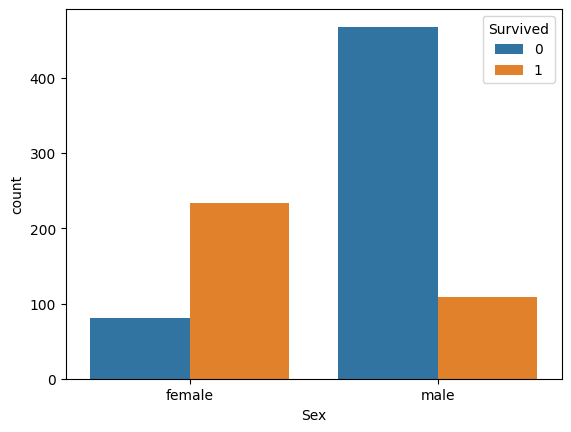

In [25]:
#Vẽ biểu đồ thể hiện tương quan giới tính vs người sống sót
sns.countplot(train_df, x = 'Sex', hue='Survived', palette='tab10')

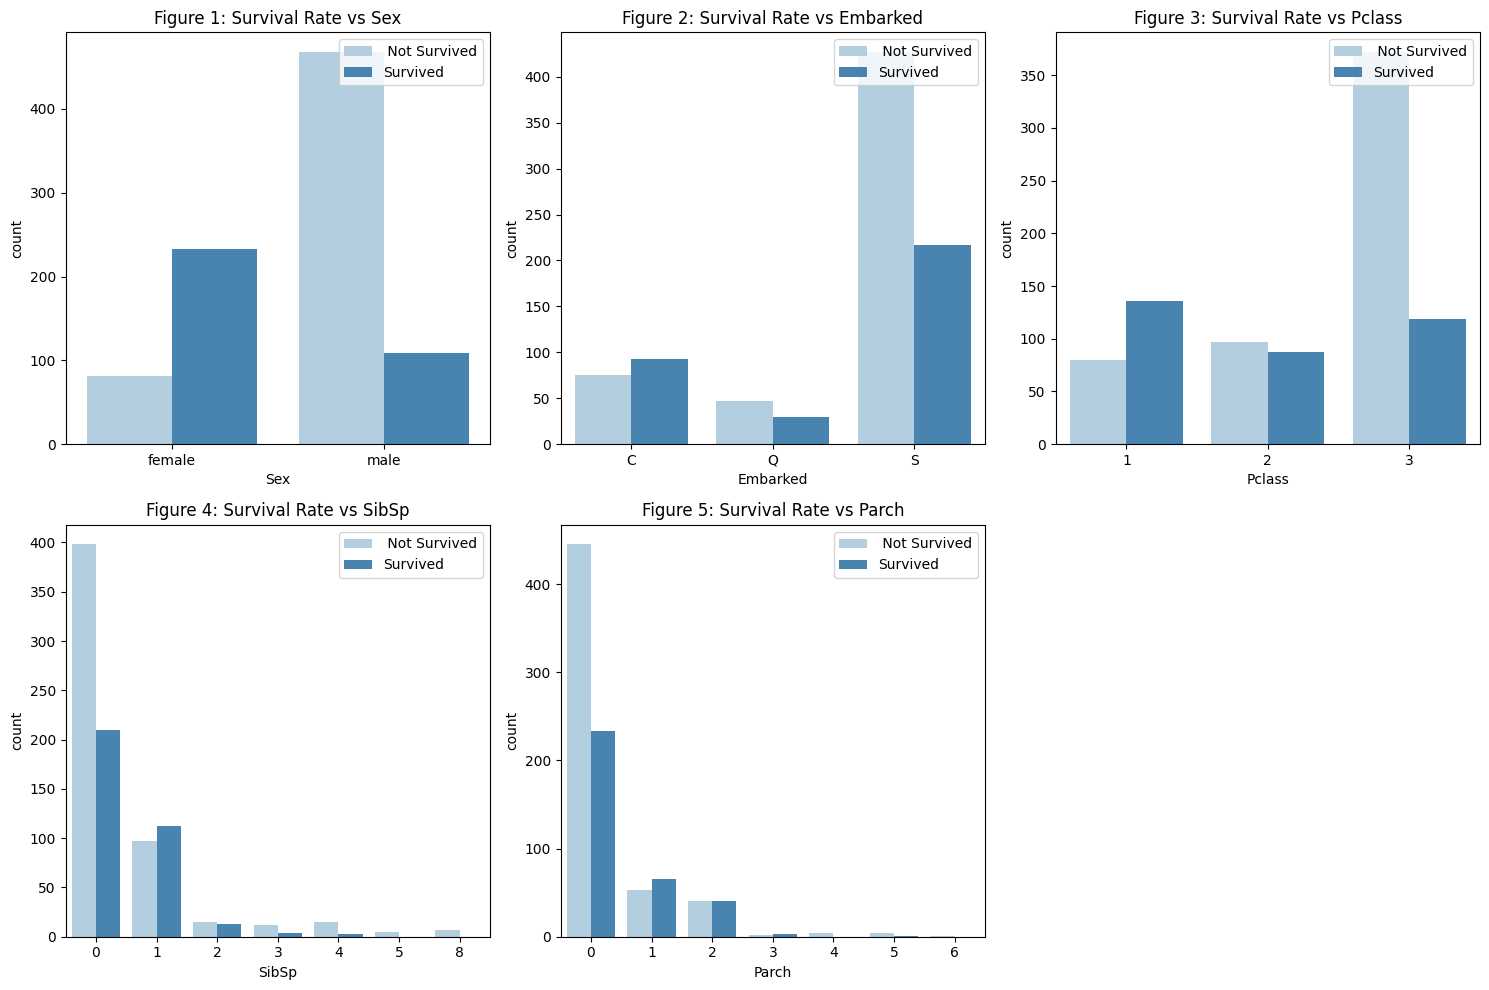

In [26]:
#Các cột dữ liệu cần biểu thị tương quan
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

# Định nghĩa số hàng, cột cần cho subplots
n_rows = 2
n_cols = 3

#Setup plots
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*5, n_rows*5)) #Số hàng, số cột và kích thước mỗi biểu đồ

#Vòng lặp vẽ biểu đồ
for r in range (0, n_rows):
    for c in range (0, n_cols):
        i = r*n_cols + c #index loop through list 'cols'
        if i < len(cols): # Loại trừ vẽ biểu đồ cuối
            ax_i = ax[r,c] # Gán vị trí từng biểu đồ cho ax_i
            sns.countplot(train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i) #Vẽ biểu đồ
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}')
            ax_i.legend(title = '', loc = 'upper right', labels=[' Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #Ẩn biều đồ cuối
plt.tight_layout() #Căn chỉnh layout

* Tổng quát biểu đồ:
1. Tỷ lệ sống sót so với giới tính -> Phụ nữ có tỷ lệ sống sót cao hơn
2. Tỷ lệ sống sót với cảng khởi đầu -> Những người bắt đầu ở cảng C có cơ hội sống sót cao hơn với 2 cảng Queentown và Southamton
3. Những người ở vị trí Class 1 (Business Class) - có tỷ lệ sống sót cao hơn so với các hạng ghế còn lại
4. Ở biểu đồ này, tỷ lệ sống sót của những người đi với 1 anh/chị em cao hơn, đi một mình (khoảng hơn 60% tử vong), các vị trí còn lại không đáng kể
5. Biểu đồ này cũng khá tương tự với biểu đồ 4, nhận thấy chưa có quá khác biệt giữa 2 biểu đồ này.

#### EDA for Numberical Feature

- Numberical feature: Age, Fare

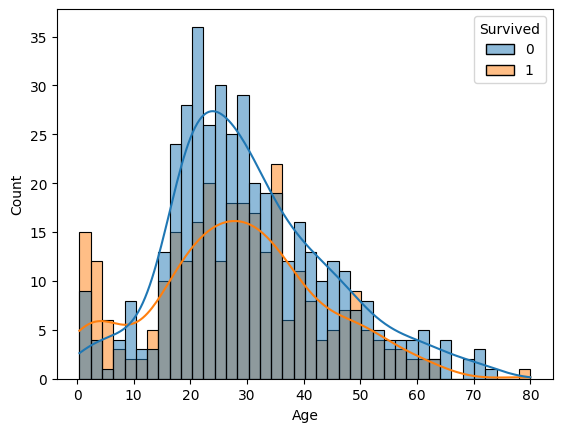

In [27]:
#Age
sns.histplot(train_df, x = 'Age', hue='Survived', bins=40, kde=True);

In [28]:
#Fare
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

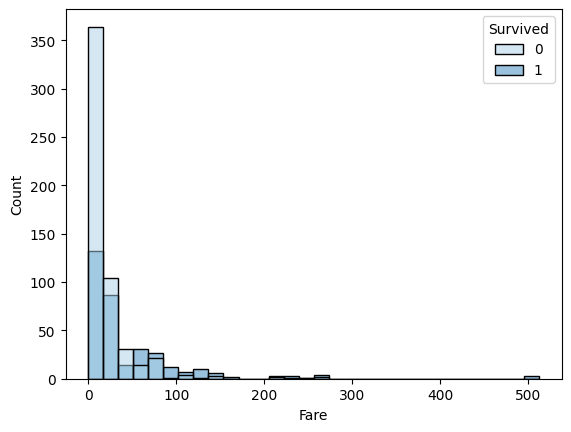

In [29]:
sns.histplot(train_df, x = 'Fare', hue='Survived', palette='Blues', bins=30);

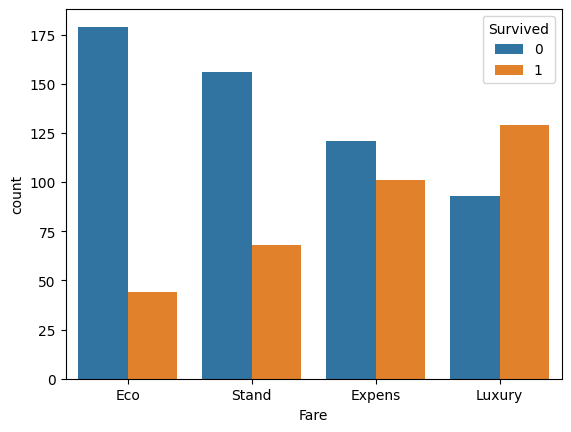

In [30]:
#Chia biểu đồ phí thành 4 phần

fare_categories = ['Eco', 'Stand', 'Expens', 'Luxury']
quartitle_data =  pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartitle_data, hue=train_df['Survived']);

### 3. Feature Engineering 

* Loại bỏ các dữ liệu dư thừa ở cột 'Name'

In [31]:
#Name
train_df['Name'] 

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [32]:
#Import thư viện re để sử dụng các hàm liên quan đến biểu thức chính quy.
import re #regular expression

#Định nghĩa hàm extract_title(name), nhận vào một chuỗi name là tên từ cột "Name".
def extract_title(name):
    '''
Biểu thức chính quy r",([\w\s]+)\." có ý nghĩa như sau:

    , : Khớp với ký tự dấu phẩy.
    ([\w\s]+) : Đây là một nhóm con trong dấu ngoặc. Trong nhóm con này:
    [\w\s]+ : Khớp với một hoặc nhiều ký tự từ tập hợp [\w\s].
    [\w] : Khớp với bất kỳ ký tự nào là chữ cái hoặc số hoặc dấu gạch dưới (underscores).
    [\s] : Khớp với bất kỳ ký tự khoảng trắng nào (ví dụ: dấu cách, tab).
    + : Biểu thức [\w\s] phải khớp ít nhất một lần.
    \. : Khớp với ký tự dấu chấm.

Tóm lại, biểu thức chính quy này có tác dụng trích xuất một chuỗi bắt đầu từ dấu phẩy, và kết thúc bằng dấu chấm.
Trong chuỗi đầu vào. Chuỗi này có thể bao gồm bất kỳ ký tự chữ cái, số hoặc khoảng trắng nào.
    '''
    p = re.compile(r",([\w\s]+)\.")
    '''
    Sử dụng phương thức search() của pattern object để tìm kiếm chuỗi name theo pattern đã được chỉ định.
    Sử dụng phương thức groups(1) để trả về tất cả các nhóm trong kết quả tìm kiếm.
    Sử dụng chỉ số [0] để lấy giá trị từ nhóm đầu tiên
    Sử dụng phương thức strip() để loại bỏ khoảng trắng xung quanh chuỗi.
    '''
    return p.search(name).groups(1)[0].strip() 
'''
Áp dụng hàm extract_title() cho mỗi phần tử trong cột "Name" của DataFrame "train_df" thông qua phương thức apply(),
và trả về một Series chứa các tiêu đề được trích xuất.
'''
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))


In [33]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [34]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [35]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [36]:
def group_title (title):
    if title in  ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

#Group các họ ít gặp thành other
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [37]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [38]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

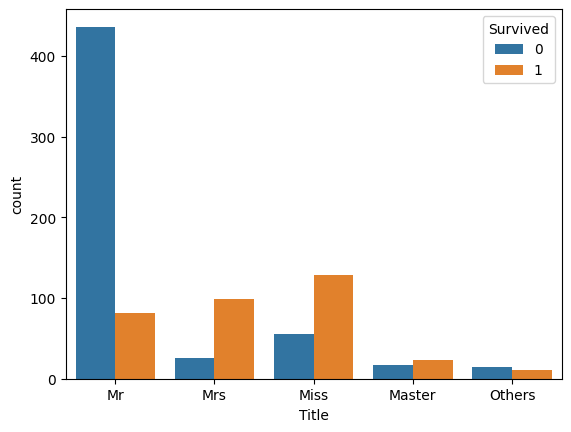

In [39]:
sns.countplot(train_df, x='Title', hue="Survived");

#### Family
* Group SibSp, Parch

In [40]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [41]:
train_df['Family_Categories'] = pd.cut(train_df['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Categories'] = pd.cut(test_df['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])

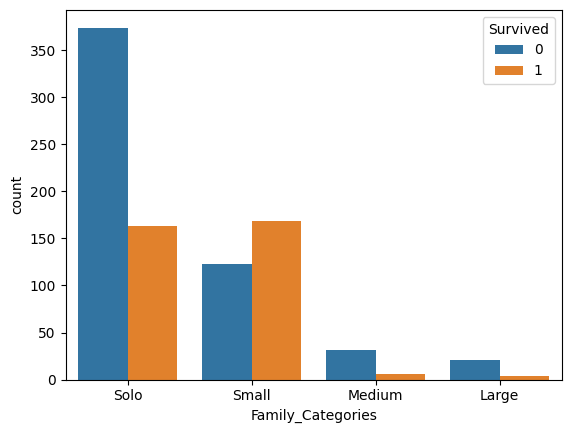

In [42]:
sns.countplot(train_df, x = 'Family_Categories', hue="Survived");

### 4. Data Wrangling - Sắp xếp dữ liệu

In [43]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Categories']
features_cols = num_features + cat_features
features_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Categories']

In [44]:
def display_missing(df, features_cols):
    n_rows = df.shape[0]
    for col in features_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"columns {col} has {missing_count*100/n_rows:.2f}% missing value")

display_missing(train_df, features_cols)
display_missing(test_df, features_cols)


columns Age has 19.87% missing value
columns Embarked has 0.22% missing value
columns Age has 20.57% missing value
columns Fare has 0.24% missing value


#### Filling Data Missing

#### Age
 - filling missing values with `median` of whole dataset

In [45]:
#Tính và xem trung bình tuổi theo nhóm 'sex' và 'Pclss';
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
age_by_sex_pclass


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [46]:
train_df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [47]:
# Tính giá trị trung bình của từng nhóm 'Sex' và 'Pclass'
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median')
# Thay thế các giá trị NaN trong cột 'Age' bằng giá trị trung bình của nhóm 'Sex' và 'Pclass' tương ứng
train_df['Age'] = train_df['Age'].fillna(age_by_sex_pclass)


In [48]:
train_df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [49]:
# Tính giá trị trung bình của từng nhóm 'Sex' và 'Pclass'
age_by_sex_pclass = test_df.groupby(['Sex', 'Pclass'])['Age'].transform('median')
# Thay thế các giá trị NaN trong cột 'Age' bằng giá trị trung bình của nhóm 'Sex' và 'Pclass' tương ứng
test_df['Age'] = test_df['Age'].fillna(age_by_sex_pclass)

In [50]:
test_df['Age']

PassengerId
892     34.5
893     47.0
894     62.0
895     27.0
896     22.0
        ... 
1305    24.0
1306    39.0
1307    38.5
1308    24.0
1309    24.0
Name: Age, Length: 418, dtype: float64

In [51]:
display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

columns Embarked has 0.22% missing value
columns Fare has 0.24% missing value


In [52]:
X = train_df[features_cols]
Y = train_df['Survived']

In [53]:
X_test = test_df[features_cols]

In [54]:
#Preprocess pipeline    
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [55]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [56]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Categories'])])

In [57]:
X = preprocessor.transform(X)

In [58]:
X_test = preprocessor.transform(X_test)

### 5. Model Training

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

In [60]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [61]:
X_test.shape

(418, 19)

#### Binary classification

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report,   confusion_matrix

log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [63]:
log_reg.score(X_val, Y_val)

0.8156424581005587

In [64]:
Y_pred = log_reg.predict(X_val)

In [65]:
precision_score(Y_val, Y_pred), recall_score(Y_val, Y_pred)

(0.7692307692307693, 0.7352941176470589)

In [66]:
print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [67]:
poly = PolynomialFeatures(degree=5)
poly_features_x_train = poly.fit_transform(X_train) 
poly_features_x_val = poly.transform(X_val)

In [68]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_x_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [69]:
poly_log_reg.score(poly_features_x_val, Y_val)

0.7988826815642458

#### Decision Tree

In [70]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, random_state=2022)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [71]:
decision_tree.score(X_val, Y_val)

0.8100558659217877

### Cross-Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, Y, scoring='accuracy', cv=5) 

In [78]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [80]:
dt_scores = cross_val_score(dt_cv, X, Y, scoring='accuracy', cv=5)

In [81]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

#### Baseline Model Comparison

In [83]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

models = [
    LinearSVC(random_state=2023),
    SVC(random_state=2023),
    KNeighborsClassifier(metric='minkowski', p = 2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=2023),
    RandomForestClassifier(random_state=2023),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_endcode = False, eval_metric = 'logloss', random_state=2023)
]
